<a href="https://colab.research.google.com/github/Adeeshdiwan/Remote-Sensing/blob/master/MAIN_SURFACE_FORCES_ANALYSIS_NASA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
brsdincer_main_surface_forces_climate_change_nasa_path = kagglehub.dataset_download('brsdincer/main-surface-forces-climate-change-nasa')

print('Data source import complete.')


# PACKAGES AND LIBRARIES

# HISTORY

#### MAIN SURFACE FORCES / CLIMATE CHANGE / NASA

##### 2018-2019-2020-2021 OCTOBER 1 DATA / TIME SERIES

**This data has 4 parameters about main surface forces**

* Temperature
* Pressure
* Height
* Humidity


* **The planetary boundary layer (PBL) height is a fundamental parameter characterizing the vertical extent of atmospheric mixing near the surface. It is critical for understanding the PBL process and low cloud evolution and its feedback on the climate system, which remains a key uncertainty in climate modeling. The PBL height is generally defined as the altitude of a transition layer where air temperature or humidity gradient are significant within the lowest 1-5 kilometers above the surface.**

* **Numerous thermodynamic parameters, including temperature, humidity (specific/relative humidity) and their derivatives (e.g., potential/virtual potential temperature etc.) have been widely used to define the PBL height. Advances in satellite remote sensing technique allow novel ways to detect the PBL heights from space. Many new parameters are proposed for PBL height detection including GPS radio occultation (RO) measurements (e.g., refractivity, bending angle and dry-temperature) and CALIPSO lidar backscattering measurements (e.g., cloud-top-height).**

In [ ]:
import pandas as pd
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as mtpltcm
from mpl_toolkits.mplot3d import Axes3D
import random
import folium
from folium.plugins import HeatMap, HeatMapWithTime
from folium import plugins
from netCDF4 import Dataset
import cartopy.crs as ccrs
import pydub
from scipy.io.wavfile import read, write
import librosa
import librosa.display
import IPython
from IPython.display import Audio
import scipy
import skimage
from IPython.display import HTML
import matplotlib.animation as animation
import PIL
from scipy import signal
from scipy.fft import fftshift
from mpl_toolkits.mplot3d import art3d
import os
import os.path
from pathlib import Path
import glob
import plotly.express as px
import plotly.offline as po
import plotly.graph_objs as pg


from warnings import filterwarnings

filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning)
filterwarnings("ignore", category=UserWarning)
filterwarnings("ignore", category=RuntimeWarning)

# READING AND INFORMATIONS

### PATH

In [ ]:
PATH_2018 = "../input/main-surface-forces-climate-change-nasa/MAIN_SURFACE_FORCE/OCT_1_2018/inst1_2d_lfo_Nx-202110040929output.24143.webform.nc4"
PATH_2019 = "../input/main-surface-forces-climate-change-nasa/MAIN_SURFACE_FORCE/OCT_1_2019/inst1_2d_lfo_Nx-202110040944output.30662.webform.nc4"
PATH_2020 = "../input/main-surface-forces-climate-change-nasa/MAIN_SURFACE_FORCE/OCT_1_2020/inst1_2d_lfo_Nx-202110040959output.4810.webform.nc4"
PATH_2021 = "../input/main-surface-forces-climate-change-nasa/MAIN_SURFACE_FORCE/OCT_1_2021/inst1_2d_lfo_Nx-202110041013output.12466.webform.nc4"

### READING

In [ ]:
READING_2018 = Dataset(PATH_2018)
READING_2019 = Dataset(PATH_2019)
READING_2020 = Dataset(PATH_2020)
READING_2021 = Dataset(PATH_2021)

In [ ]:
READING_LIST = [READING_2018,READING_2019,READING_2020,READING_2021]
YEAR_NAME_LIST = ["2018","2019","2020","2021"]

In [ ]:
for x_read,x_year in zip(READING_LIST,YEAR_NAME_LIST):
    print("\n")
    print(x_year)
    print("---"*5)
    print(x_read)
    print("----"*10)
    print("\n")



2018
---------------
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: COARDS
    calendar: standard
    comments: File
    model: geos/das
    center: gsfc
    dimensions(sizes): time(24), longitude(1152), latitude(721)
    variables(dimensions): float64 time(time), float64 longitude(longitude), float64 latitude(latitude), float32 hlml(time, latitude, longitude), float32 tlml(time, latitude, longitude), float32 ps(time, latitude, longitude), float32 speedlml(time, latitude, longitude), float32 qlml(time, latitude, longitude)
    groups: 
----------------------------------------




2019
---------------
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: COARDS
    calendar: standard
    comments: File
    model: geos/das
    center: gsfc
    dimensions(sizes): time(24), longitude(1152), latitude(721)
    variables(dimensions): float64 time(time), float64 longitude(longitude), floa

### GETTING INFORMATIONS

In [ ]:
for x_read,x_year in zip(READING_LIST,YEAR_NAME_LIST):
    print("\n")
    print(x_year)
    print("---"*5)
    print(x_read.variables.keys())
    print("----"*10)
    print("\n")



2018
---------------
dict_keys(['time', 'longitude', 'latitude', 'hlml', 'tlml', 'ps', 'speedlml', 'qlml'])
----------------------------------------




2019
---------------
dict_keys(['time', 'longitude', 'latitude', 'hlml', 'tlml', 'ps', 'speedlml', 'qlml'])
----------------------------------------




2020
---------------
dict_keys(['time', 'longitude', 'latitude', 'hlml', 'tlml', 'ps', 'speedlml', 'qlml'])
----------------------------------------




2021
---------------
dict_keys(['time', 'longitude', 'latitude', 'hlml', 'tlml', 'ps', 'speedlml', 'qlml'])
----------------------------------------




In [ ]:
SIMPLE_KEYS_LIST = ['time', 'longitude', 'latitude']

In [ ]:
for x_keys in SIMPLE_KEYS_LIST:
    print("\n")
    print(x_keys)
    print("---"*5)
    print(READING_2018.variables[x_keys].shape)
    print("----"*10)
    print("\n")



time
---------------
(24,)
----------------------------------------




longitude
---------------
(1152,)
----------------------------------------




latitude
---------------
(721,)
----------------------------------------




In [ ]:
GENERAL_KEYS_LIST = ['hlml', 'tlml', 'ps', 'speedlml', 'qlml']

In [ ]:
for x_keys in GENERAL_KEYS_LIST:
    print("\n")
    print(x_keys)
    print("---"*5)
    print(READING_2018.variables[x_keys].long_name)
    print("----"*10)
    print("\n")



hlml
---------------
surface_layer_height
----------------------------------------




tlml
---------------
surface_air_temperature
----------------------------------------




ps
---------------
surface_pressure
----------------------------------------




speedlml
---------------
surface_wind_speed
----------------------------------------




qlml
---------------
surface_specific_humidity
----------------------------------------




In [ ]:
for x_keys in GENERAL_KEYS_LIST:
    print("\n")
    print(x_keys)
    print("---"*5)
    print(READING_2018.variables[x_keys].dimensions)
    print("----"*10)
    print("\n")



hlml
---------------
('time', 'latitude', 'longitude')
----------------------------------------




tlml
---------------
('time', 'latitude', 'longitude')
----------------------------------------




ps
---------------
('time', 'latitude', 'longitude')
----------------------------------------




speedlml
---------------
('time', 'latitude', 'longitude')
----------------------------------------




qlml
---------------
('time', 'latitude', 'longitude')
----------------------------------------




In [ ]:
for x_keys in GENERAL_KEYS_LIST:
    print("\n")
    print(x_keys)
    print("---"*5)
    print(READING_2018.variables[x_keys].level_description)
    print("----"*10)
    print("\n")



hlml
---------------
Earth surface
----------------------------------------




tlml
---------------
Earth surface
----------------------------------------




ps
---------------
Earth surface
----------------------------------------




speedlml
---------------
Earth surface
----------------------------------------




qlml
---------------
Earth surface
----------------------------------------




In [ ]:
for x_keys in GENERAL_KEYS_LIST:
    print("\n")
    print(x_keys)
    print("---"*5)
    print(READING_2018.variables[x_keys].dtype)
    print("----"*10)
    print("\n")



hlml
---------------
float32
----------------------------------------




tlml
---------------
float32
----------------------------------------




ps
---------------
float32
----------------------------------------




speedlml
---------------
float32
----------------------------------------




qlml
---------------
float32
----------------------------------------




In [ ]:
for x_keys in GENERAL_KEYS_LIST:
    print("\n")
    print(x_keys)
    print("---"*5)
    print(READING_2018.variables[x_keys].shape)
    print("----"*10)
    print("\n")



hlml
---------------
(24, 721, 1152)
----------------------------------------




tlml
---------------
(24, 721, 1152)
----------------------------------------




ps
---------------
(24, 721, 1152)
----------------------------------------




speedlml
---------------
(24, 721, 1152)
----------------------------------------




qlml
---------------
(24, 721, 1152)
----------------------------------------




In [ ]:
for x_keys in GENERAL_KEYS_LIST:
    print("\n")
    print(x_keys)
    print("---"*5)
    print(READING_2018.variables[x_keys])
    print("----"*10)
    print("\n")



hlml
---------------
<class 'netCDF4._netCDF4.Variable'>
float32 hlml(time, latitude, longitude)
    comments: Unknown1 variable comment
    long_name: surface_layer_height
    units: 
    grid_name: grid01
    grid_type: linear
    level_description: Earth surface
    time_statistic: instantaneous
    missing_value: 1000000000000000.0
unlimited dimensions: time
current shape = (24, 721, 1152)
filling on, default _FillValue of 9.969209968386869e+36 used
----------------------------------------




tlml
---------------
<class 'netCDF4._netCDF4.Variable'>
float32 tlml(time, latitude, longitude)
    comments: Unknown1 variable comment
    long_name: surface_air_temperature
    units: 
    grid_name: grid01
    grid_type: linear
    level_description: Earth surface
    time_statistic: instantaneous
    missing_value: 1000000000000000.0
unlimited dimensions: time
current shape = (24, 721, 1152)
filling on, default _FillValue of 9.969209968386869e+36 used
----------------------------------

### GETTING DATA

#### 2018

In [ ]:
LONG_2018 = READING_2018.variables["longitude"][:]
LAT_2018 = READING_2018.variables["latitude"][:]
TIME_2018 = READING_2018.variables["time"][:]

hlml_2018 = READING_2018.variables["hlml"][0,:,:]
tlml_2018 = READING_2018.variables["tlml"][0,:,:]
ps_2018 = READING_2018.variables["ps"][0,:,:]
speedlml_2018 = READING_2018.variables["speedlml"][0,:,:]
qlml_2018 = READING_2018.variables["qlml"][0,:,:]

In [ ]:
VALUES_2018_LIST = [LONG_2018,LAT_2018,hlml_2018,tlml_2018,ps_2018,speedlml_2018,qlml_2018]

#### 2019

In [ ]:
LONG_2019 = READING_2019.variables["longitude"][:]
LAT_2019 = READING_2019.variables["latitude"][:]

hlml_2019 = READING_2019.variables["hlml"][0,:,:]
tlml_2019 = READING_2019.variables["tlml"][0,:,:]
ps_2019 = READING_2019.variables["ps"][0,:,:]
speedlml_2019 = READING_2019.variables["speedlml"][0,:,:]
qlml_2019 = READING_2019.variables["qlml"][0,:,:]

In [ ]:
VALUES_2019_LIST = [LONG_2019,LAT_2019,hlml_2019,tlml_2019,ps_2019,speedlml_2019,qlml_2019]

#### 2020

In [ ]:
LONG_2020 = READING_2020.variables["longitude"][:]
LAT_2020 = READING_2020.variables["latitude"][:]

hlml_2020 = READING_2020.variables["hlml"][0,:,:]
tlml_2020 = READING_2020.variables["tlml"][0,:,:]
ps_2020 = READING_2020.variables["ps"][0,:,:]
speedlml_2020 = READING_2020.variables["speedlml"][0,:,:]
qlml_2020 = READING_2020.variables["qlml"][0,:,:]

In [ ]:
VALUES_2020_LIST = [LONG_2020,LAT_2020,hlml_2020,tlml_2020,ps_2020,speedlml_2020,qlml_2020]

#### 2021

In [ ]:
LONG_2021 = READING_2021.variables["longitude"][:]
LAT_2021 = READING_2021.variables["latitude"][:]

hlml_2021 = READING_2021.variables["hlml"][0,:,:]
tlml_2021 = READING_2021.variables["tlml"][0,:,:]
ps_2021 = READING_2021.variables["ps"][0,:,:]
speedlml_2021 = READING_2021.variables["speedlml"][0,:,:]
qlml_2021 = READING_2021.variables["qlml"][0,:,:]

In [ ]:
VALUES_2021_LIST = [LONG_2021,LAT_2021,hlml_2021,tlml_2021,ps_2021,speedlml_2021,qlml_2021]

# ANALYSIS

In [ ]:
SPECIFIC_VALUES_2018 = VALUES_2018_LIST[2:]
SPECIFIC_VALUES_2019 = VALUES_2019_LIST[2:]
SPECIFIC_VALUES_2020 = VALUES_2020_LIST[2:]
SPECIFIC_VALUES_2021 = VALUES_2021_LIST[2:]

In [ ]:
plt.style.use("dark_background")

In [ ]:
GENERAL_KEYS_LIST = ['hlml', 'tlml', 'ps', 'speedlml', 'qlml']

### 2018 GENERAL

/opt/conda/lib/python3.7/site-packages/cartopy/io/__init__.py:241: DownloadWarning:

Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip



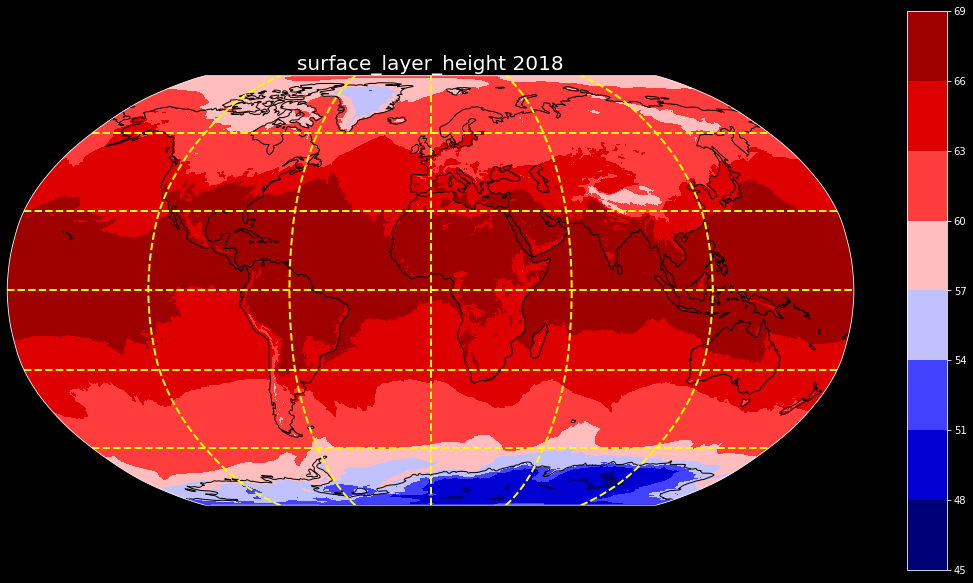

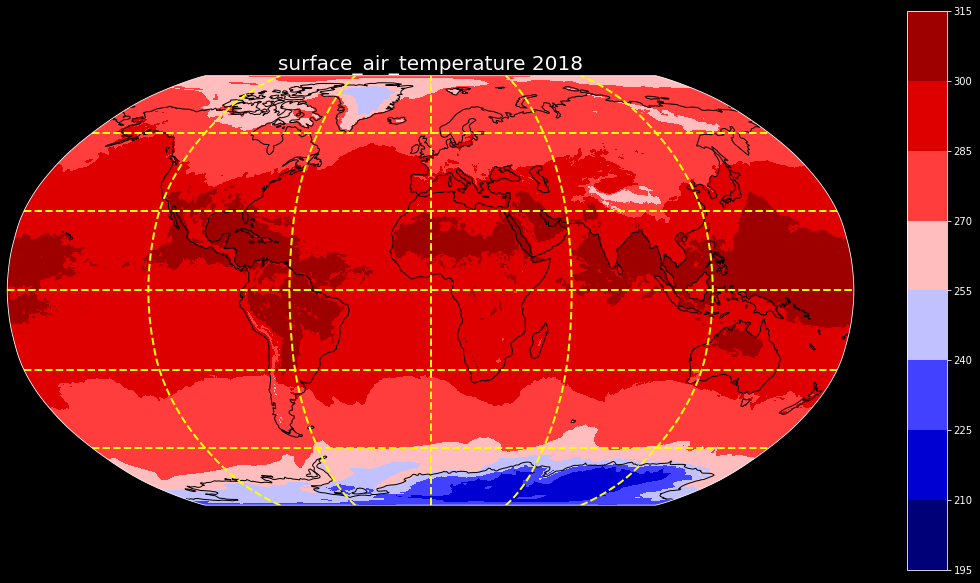

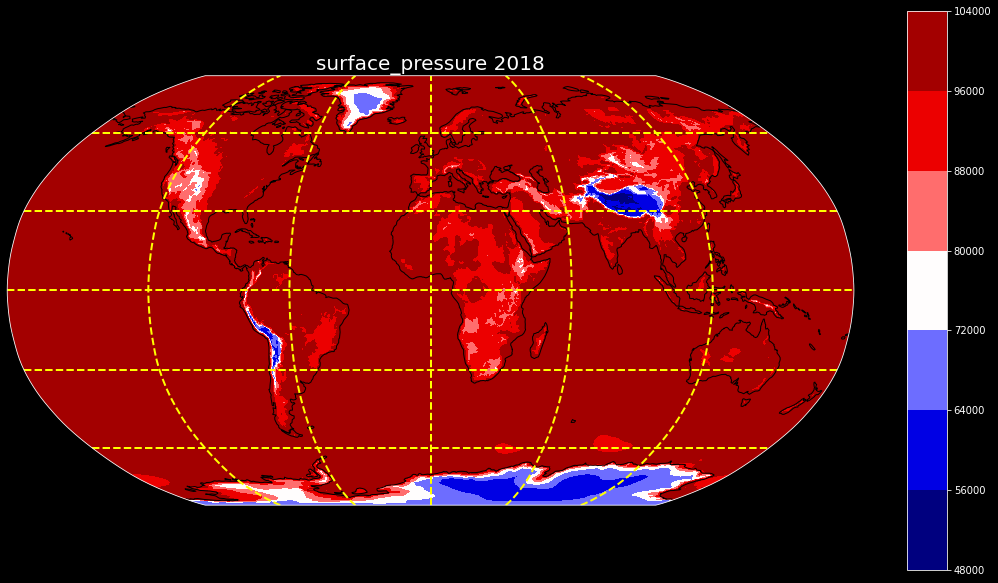

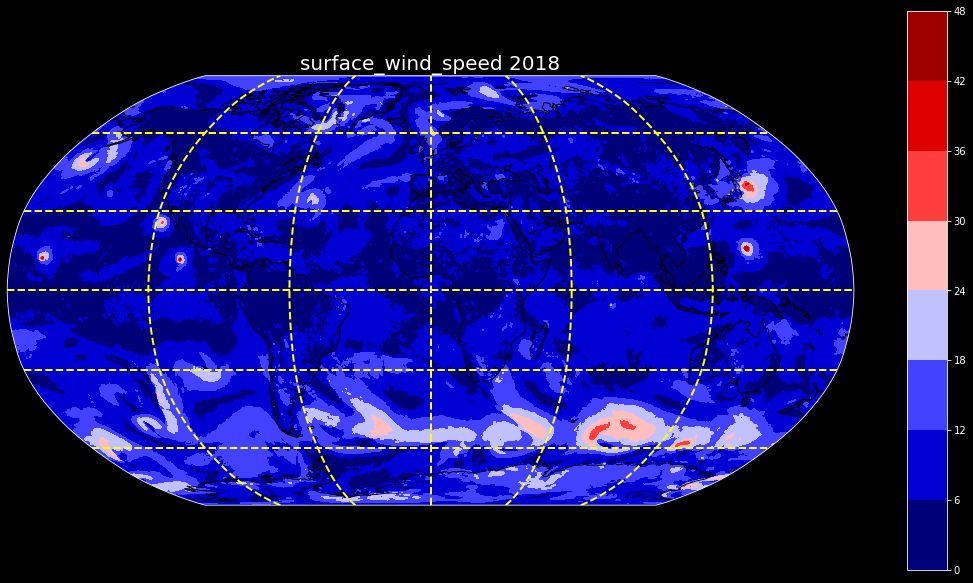

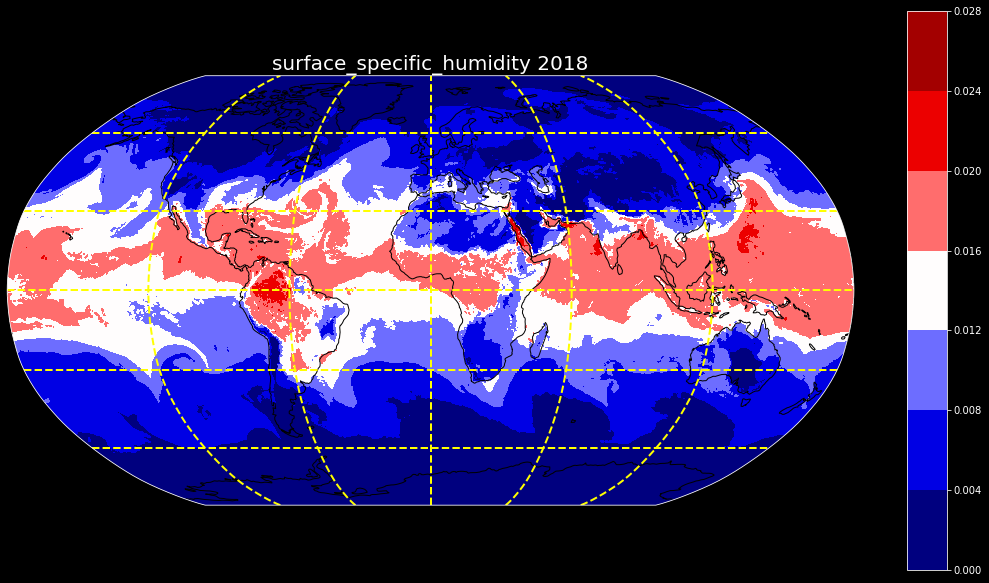

In [ ]:
for x_climate_params,x_params_name in zip(SPECIFIC_VALUES_2018,GENERAL_KEYS_LIST):


    figure = plt.figure(figsize=(15,10))

    axis_func = plt.axes(projection=ccrs.Robinson())
    axis_func.set_global()
    axis_func.coastlines(resolution="110m",linewidth=1)
    axis_func.gridlines(linestyle='--',color='yellow',linewidth=2)

    plt.contourf(LONG_2018, LAT_2018, x_climate_params, transform=ccrs.PlateCarree(),cmap="seismic")
    color_bar_func = plt.colorbar(ax=axis_func, orientation="vertical",aspect=14, shrink=0.8, extend="max")
    color_bar_func.ax.tick_params(labelsize=10)

    plt.title(READING_2018.variables[x_params_name].long_name + " " + "2018",fontsize=20)
    plt.tight_layout()
    plt.show()

In [ ]:
VALUES_2021_LIST = [LONG_2021,LAT_2021,hlml_2021,tlml_2021,ps_2021,speedlml_2021,qlml_2021]

### 2019 GENERAL

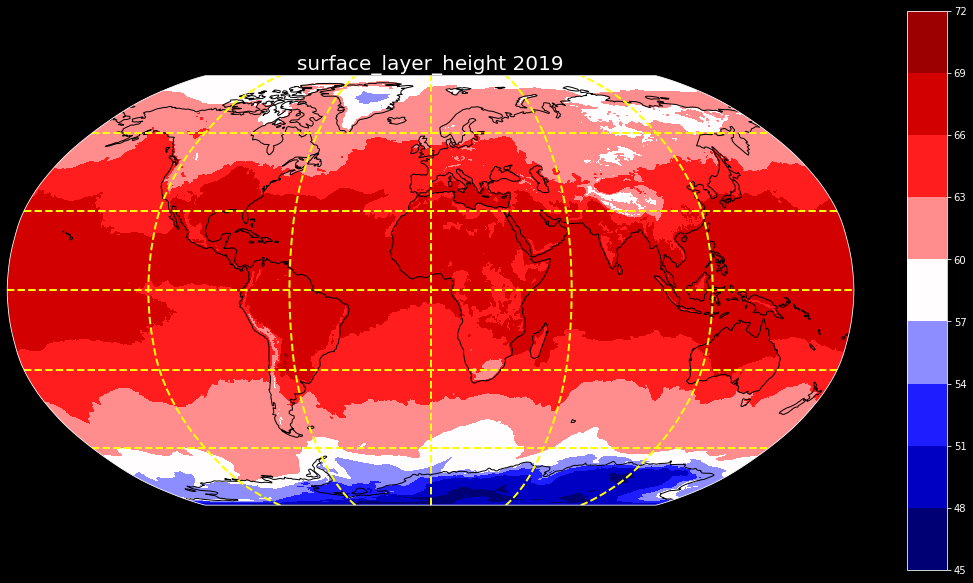

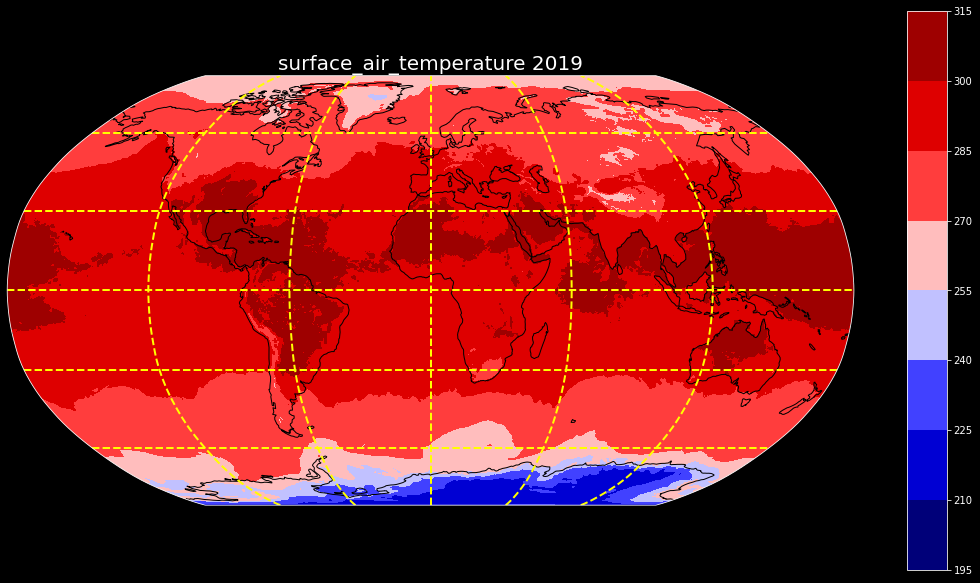

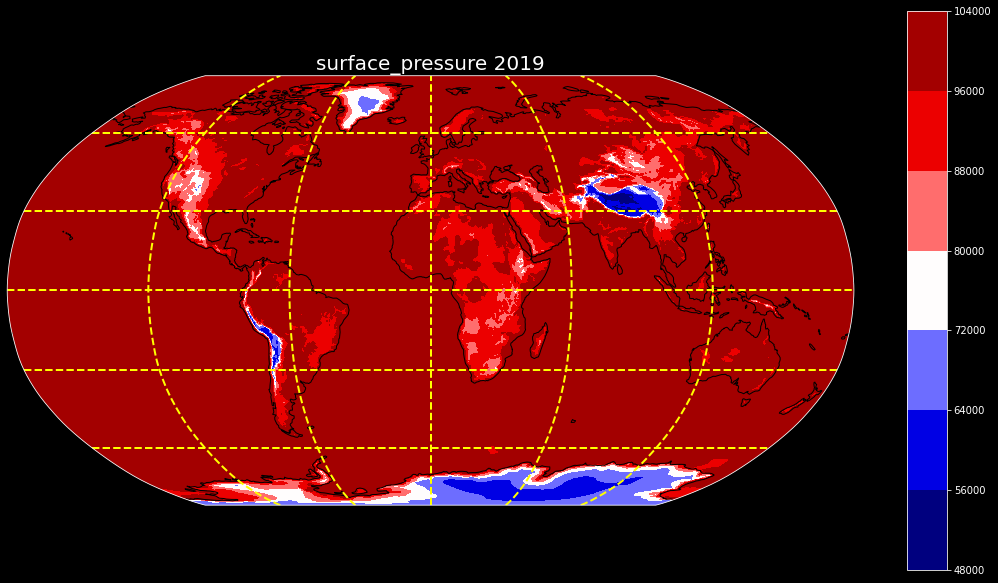

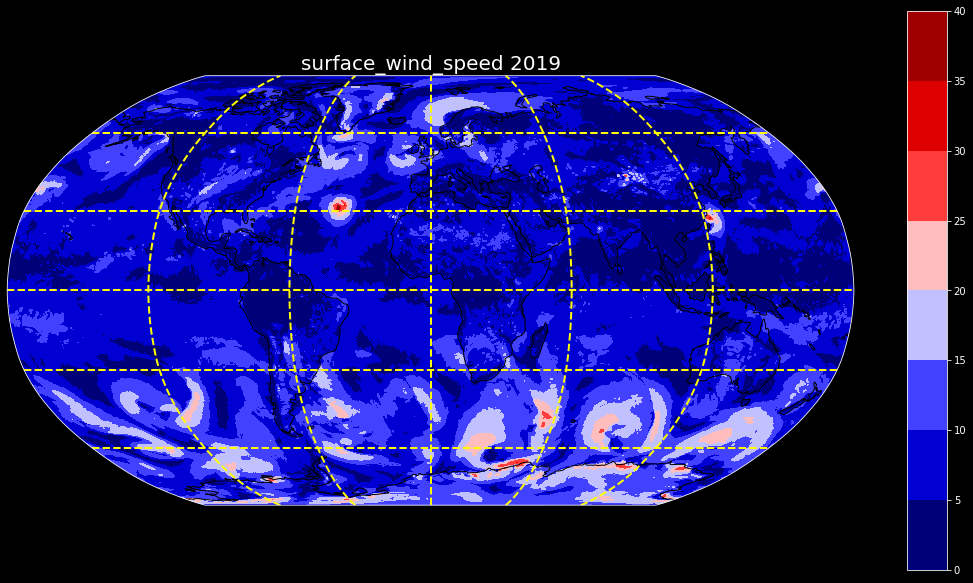

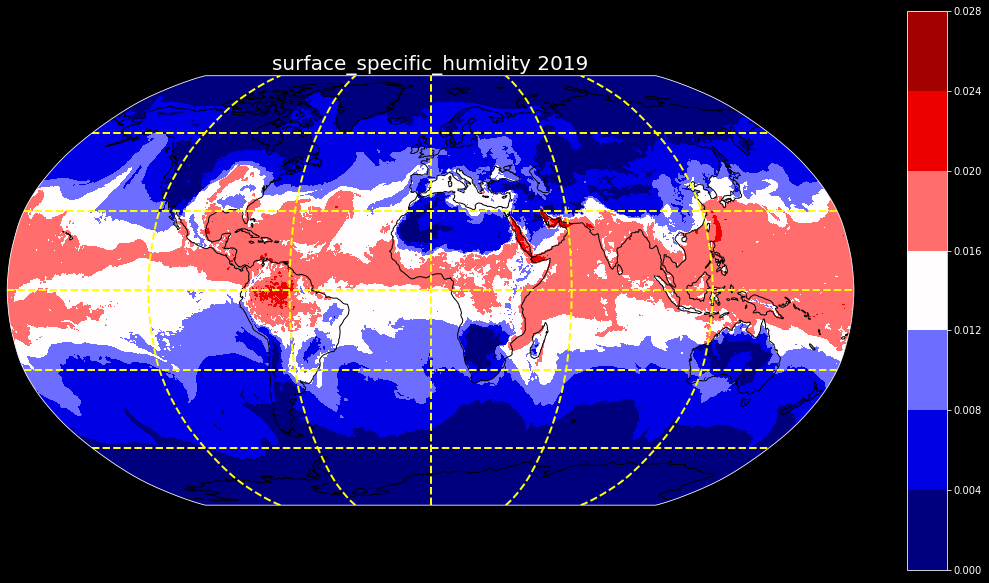

In [ ]:
for x_climate_params,x_params_name in zip(SPECIFIC_VALUES_2019,GENERAL_KEYS_LIST):


    figure = plt.figure(figsize=(15,10))

    axis_func = plt.axes(projection=ccrs.Robinson())
    axis_func.set_global()
    axis_func.coastlines(resolution="110m",linewidth=1)
    axis_func.gridlines(linestyle='--',color='yellow',linewidth=2)

    plt.contourf(LONG_2019, LAT_2019, x_climate_params, transform=ccrs.PlateCarree(),cmap="seismic")
    color_bar_func = plt.colorbar(ax=axis_func, orientation="vertical",aspect=14, shrink=0.8, extend="max")
    color_bar_func.ax.tick_params(labelsize=10)

    plt.title(READING_2018.variables[x_params_name].long_name + " " + "2019",fontsize=20)
    plt.tight_layout()
    plt.show()

### 2020 GENERAL

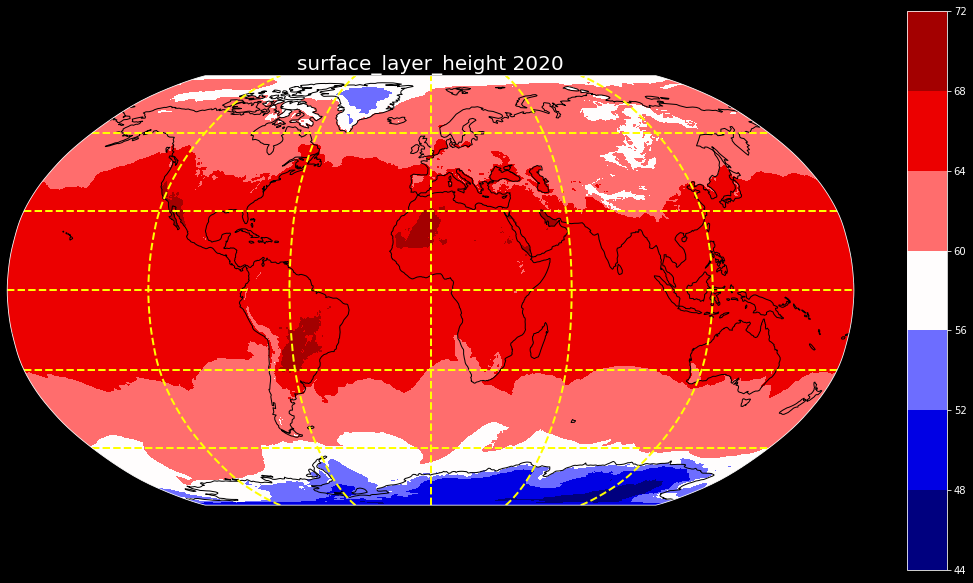

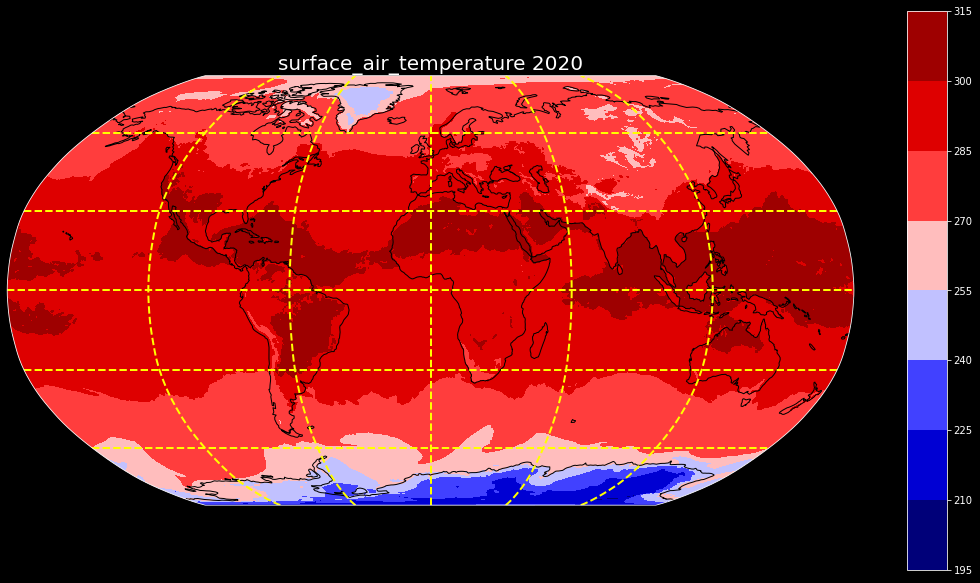

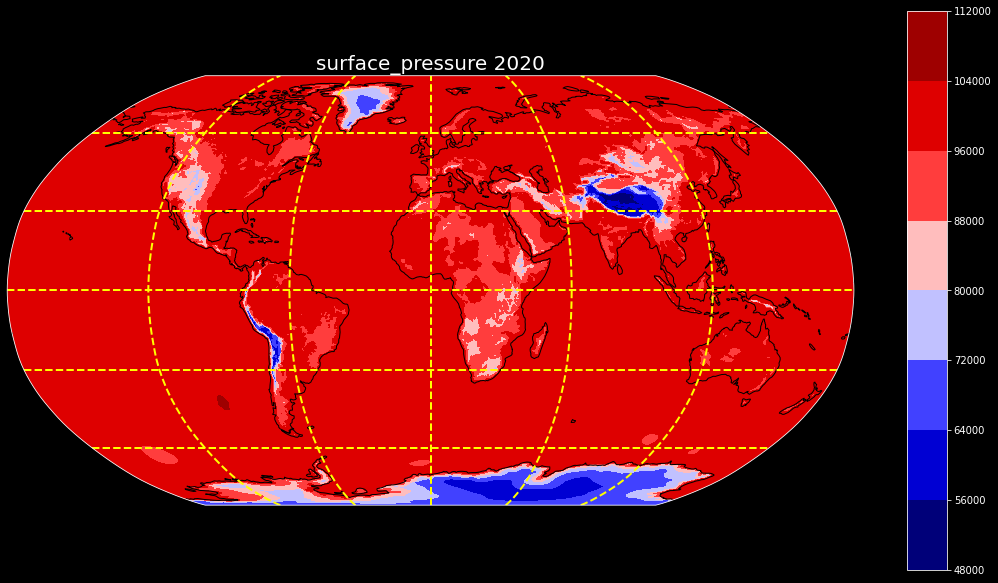

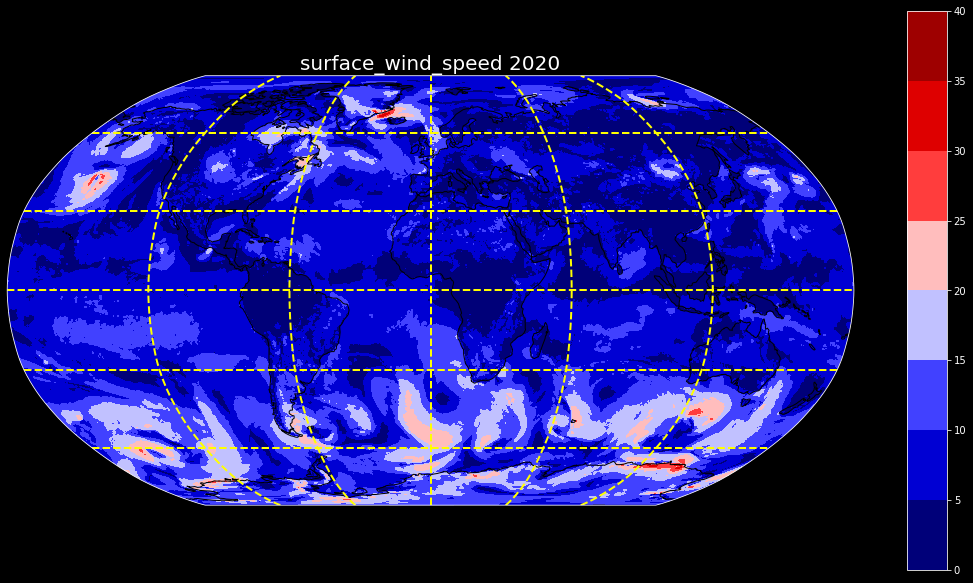

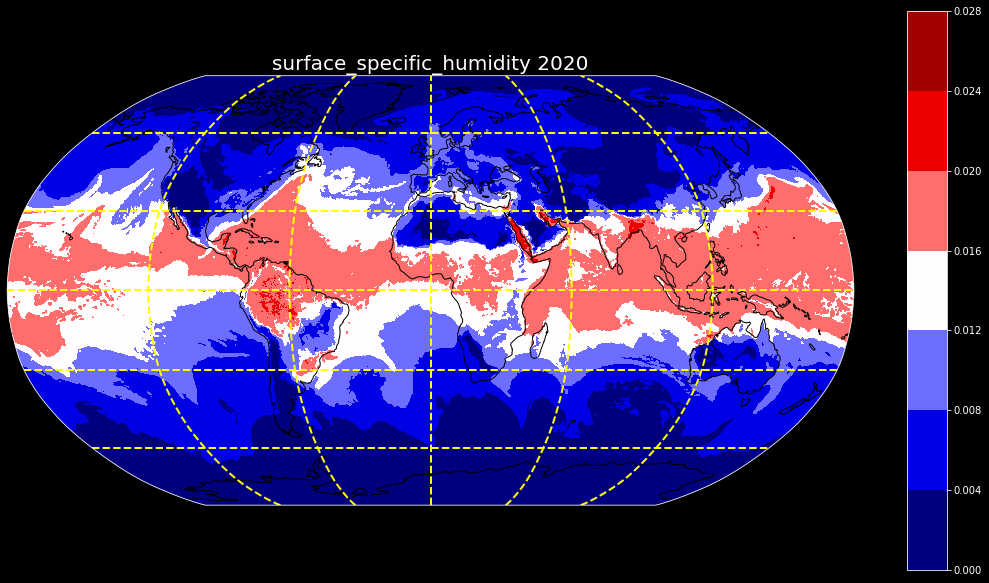

In [ ]:
for x_climate_params,x_params_name in zip(SPECIFIC_VALUES_2020,GENERAL_KEYS_LIST):


    figure = plt.figure(figsize=(15,10))

    axis_func = plt.axes(projection=ccrs.Robinson())
    axis_func.set_global()
    axis_func.coastlines(resolution="110m",linewidth=1)
    axis_func.gridlines(linestyle='--',color='yellow',linewidth=2)

    plt.contourf(LONG_2020, LAT_2020, x_climate_params, transform=ccrs.PlateCarree(),cmap="seismic")
    color_bar_func = plt.colorbar(ax=axis_func, orientation="vertical",aspect=14, shrink=0.8, extend="max")
    color_bar_func.ax.tick_params(labelsize=10)

    plt.title(READING_2018.variables[x_params_name].long_name + " " + "2020",fontsize=20)
    plt.tight_layout()
    plt.show()

### 2021 GENERAL

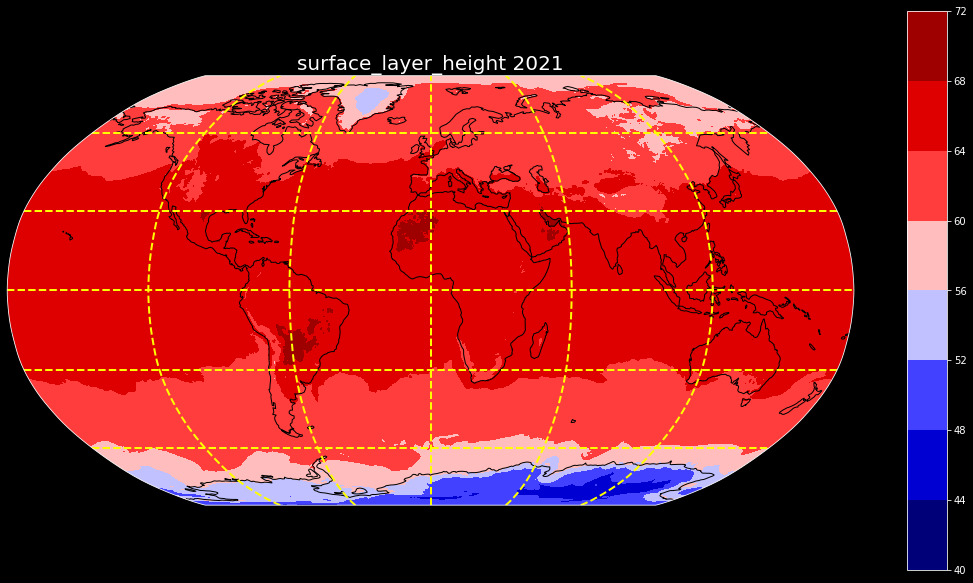

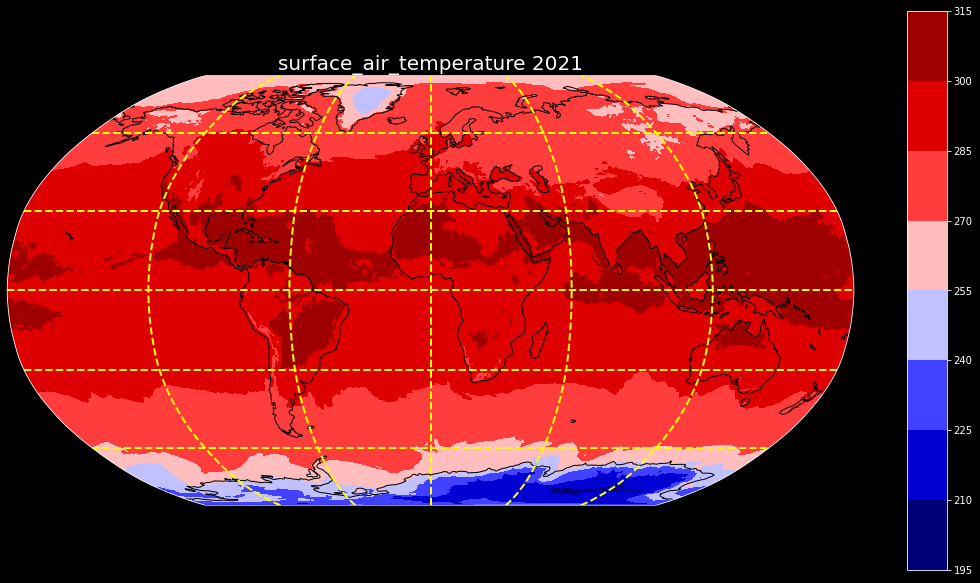

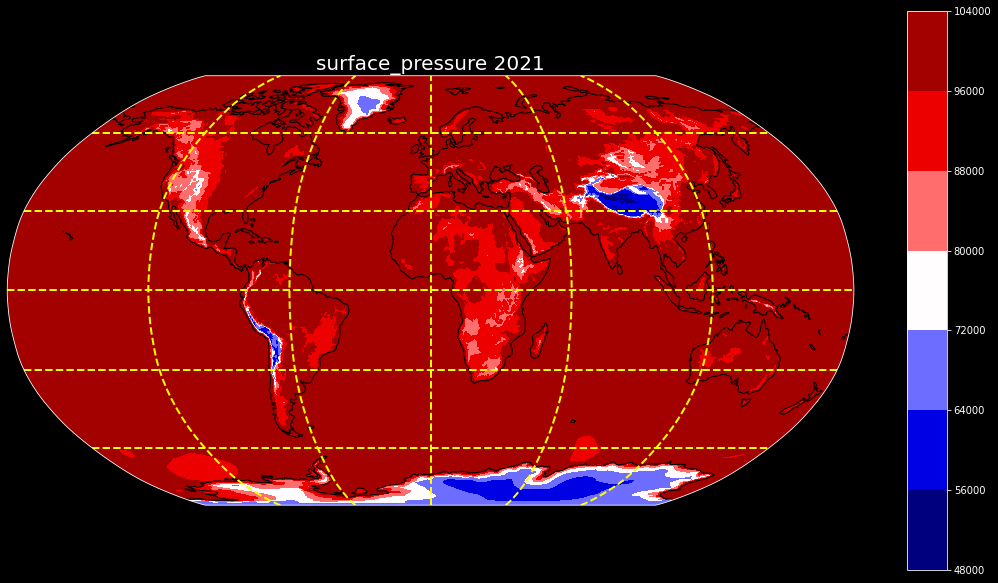

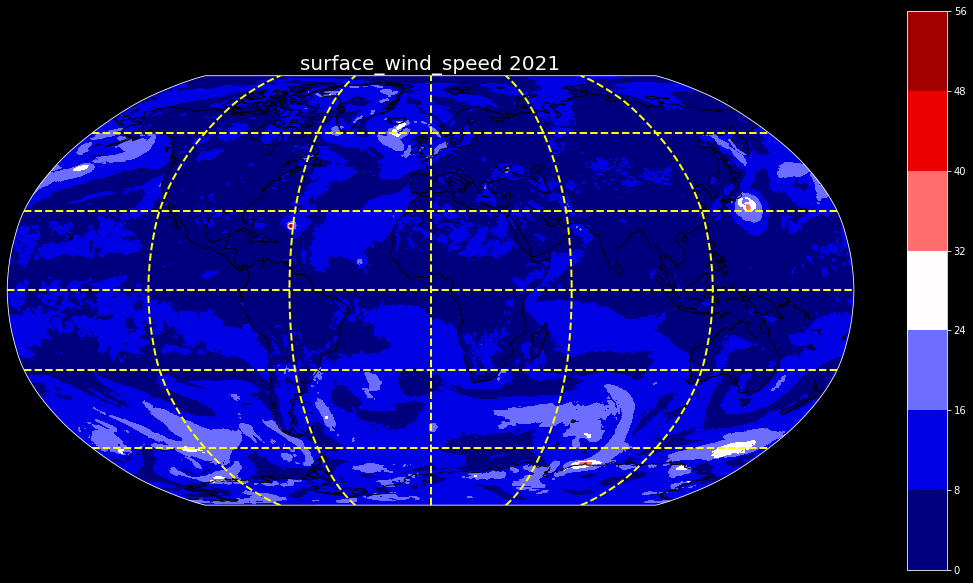

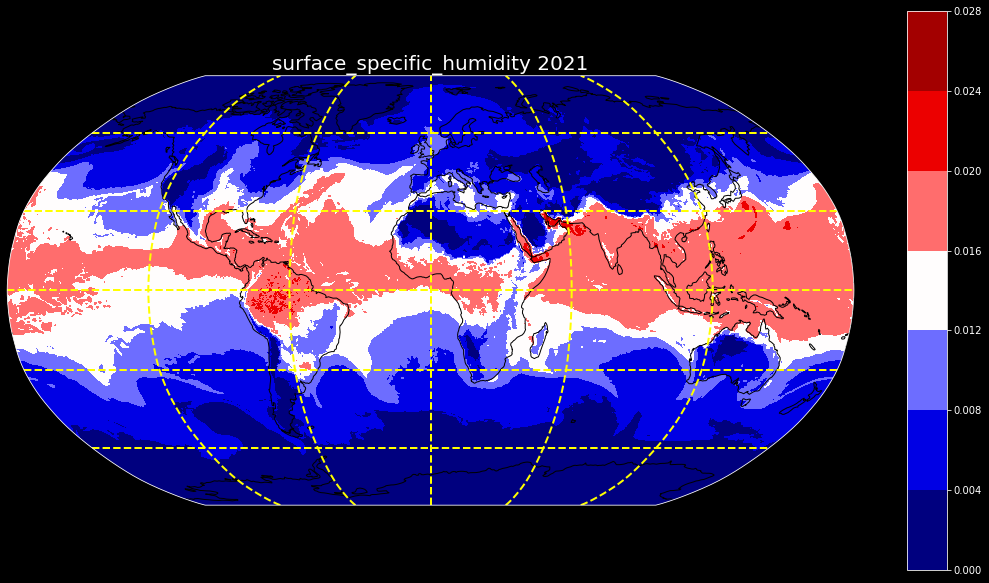

In [ ]:
for x_climate_params,x_params_name in zip(SPECIFIC_VALUES_2021,GENERAL_KEYS_LIST):


    figure = plt.figure(figsize=(15,10))

    axis_func = plt.axes(projection=ccrs.Robinson())
    axis_func.set_global()
    axis_func.coastlines(resolution="110m",linewidth=1)
    axis_func.gridlines(linestyle='--',color='yellow',linewidth=2)

    plt.contourf(LONG_2021, LAT_2021, x_climate_params, transform=ccrs.PlateCarree(),cmap="seismic")
    color_bar_func = plt.colorbar(ax=axis_func, orientation="vertical",aspect=14, shrink=0.8, extend="max")
    color_bar_func.ax.tick_params(labelsize=10)

    plt.title(READING_2018.variables[x_params_name].long_name + " " + "2021",fontsize=20)
    plt.tight_layout()
    plt.show()

### COMPARING

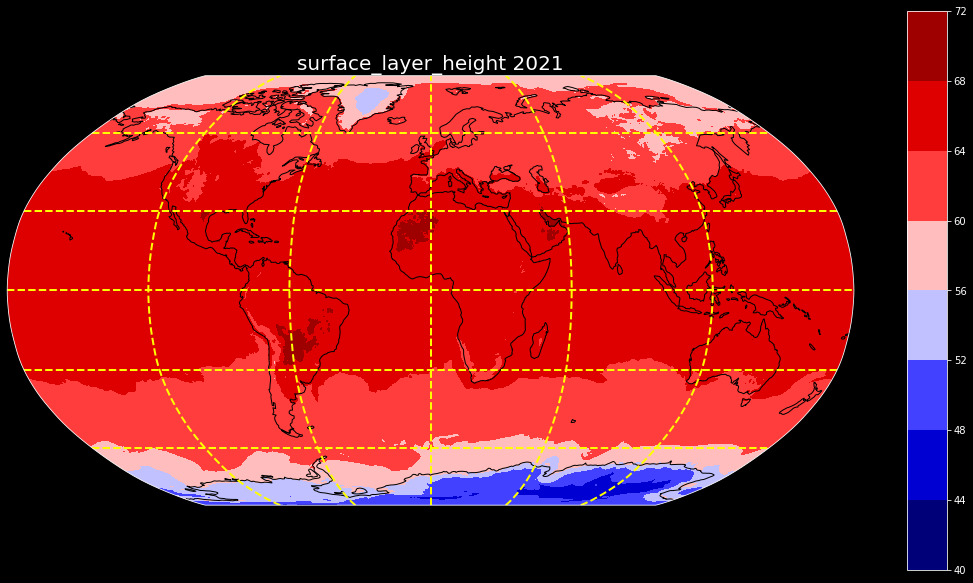

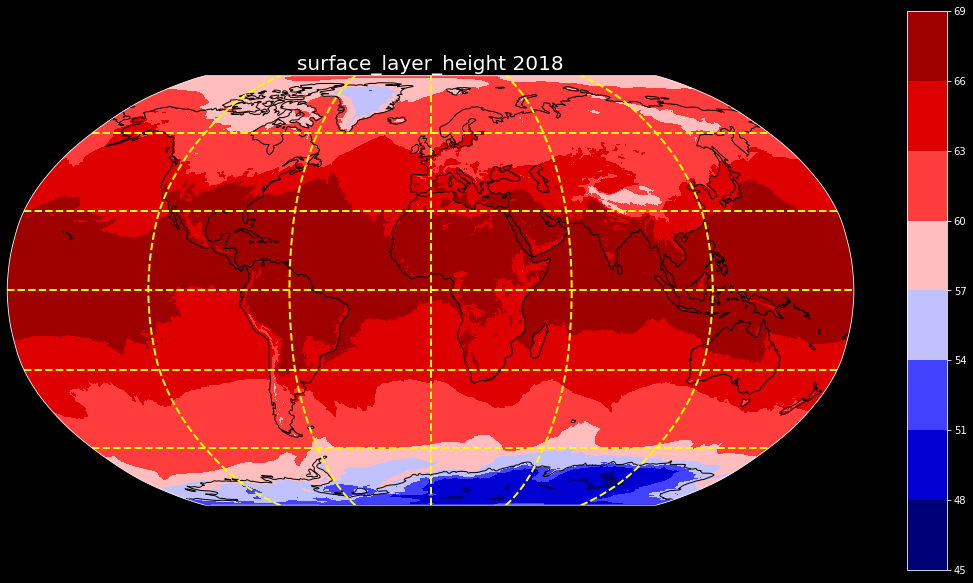

In [ ]:
figure = plt.figure(figsize=(15,10))

axis_func = plt.axes(projection=ccrs.Robinson())
axis_func.set_global()
axis_func.coastlines(resolution="110m",linewidth=1)
axis_func.gridlines(linestyle='--',color='yellow',linewidth=2)

plt.contourf(LONG_2021, LAT_2021, hlml_2021, transform=ccrs.PlateCarree(),cmap="seismic")
color_bar_func = plt.colorbar(ax=axis_func, orientation="vertical",aspect=14, shrink=0.8, extend="max")
color_bar_func.ax.tick_params(labelsize=10)

plt.title(READING_2021.variables["hlml"].long_name + " " + "2021",fontsize=20)
plt.tight_layout()
plt.show()

#


figure = plt.figure(figsize=(15,10))

axis_func = plt.axes(projection=ccrs.Robinson())
axis_func.set_global()
axis_func.coastlines(resolution="110m",linewidth=1)
axis_func.gridlines(linestyle='--',color='yellow',linewidth=2)

plt.contourf(LONG_2018, LAT_2018, hlml_2018, transform=ccrs.PlateCarree(),cmap="seismic")
color_bar_func = plt.colorbar(ax=axis_func, orientation="vertical",aspect=14, shrink=0.8, extend="max")
color_bar_func.ax.tick_params(labelsize=10)

plt.title(READING_2018.variables["hlml"].long_name + " " + "2018",fontsize=20)
plt.tight_layout()
plt.show()

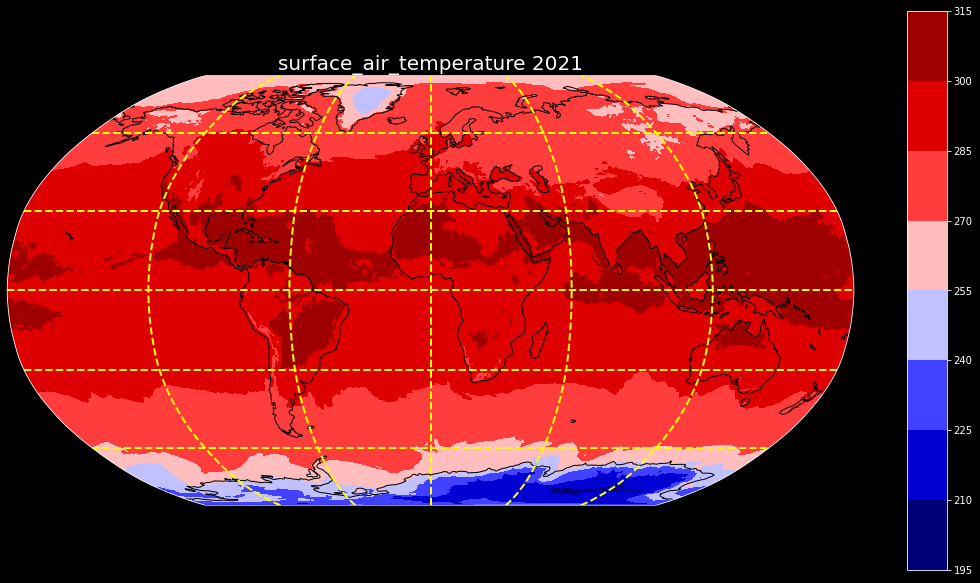

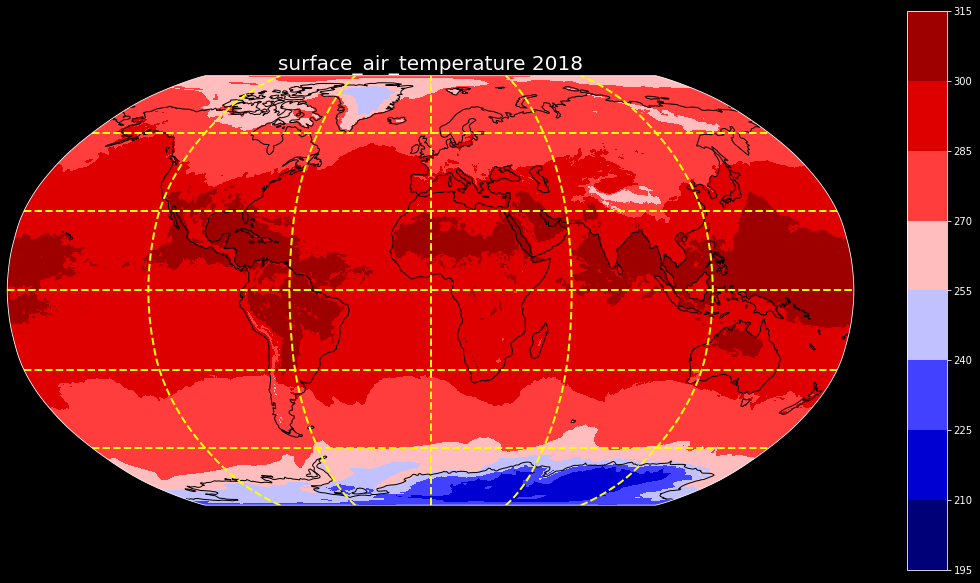

In [ ]:
figure = plt.figure(figsize=(15,10))

axis_func = plt.axes(projection=ccrs.Robinson())
axis_func.set_global()
axis_func.coastlines(resolution="110m",linewidth=1)
axis_func.gridlines(linestyle='--',color='yellow',linewidth=2)

plt.contourf(LONG_2021, LAT_2021, tlml_2021, transform=ccrs.PlateCarree(),cmap="seismic")
color_bar_func = plt.colorbar(ax=axis_func, orientation="vertical",aspect=14, shrink=0.8, extend="max")
color_bar_func.ax.tick_params(labelsize=10)

plt.title(READING_2021.variables["tlml"].long_name + " " + "2021",fontsize=20)
plt.tight_layout()
plt.show()

#


figure = plt.figure(figsize=(15,10))

axis_func = plt.axes(projection=ccrs.Robinson())
axis_func.set_global()
axis_func.coastlines(resolution="110m",linewidth=1)
axis_func.gridlines(linestyle='--',color='yellow',linewidth=2)

plt.contourf(LONG_2018, LAT_2018, tlml_2018, transform=ccrs.PlateCarree(),cmap="seismic")
color_bar_func = plt.colorbar(ax=axis_func, orientation="vertical",aspect=14, shrink=0.8, extend="max")
color_bar_func.ax.tick_params(labelsize=10)

plt.title(READING_2018.variables["tlml"].long_name + " " + "2018",fontsize=20)
plt.tight_layout()
plt.show()

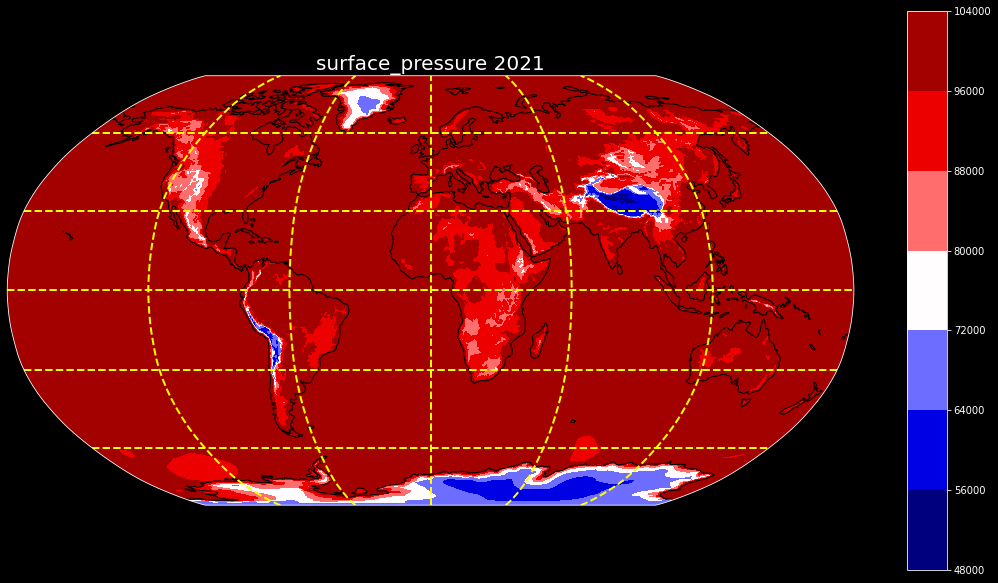

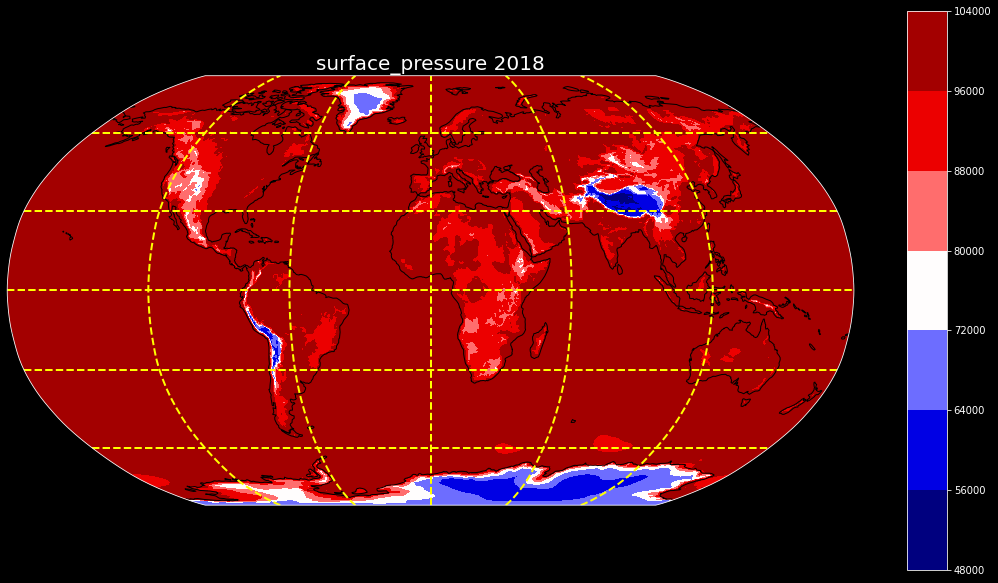

In [ ]:
figure = plt.figure(figsize=(15,10))

axis_func = plt.axes(projection=ccrs.Robinson())
axis_func.set_global()
axis_func.coastlines(resolution="110m",linewidth=1)
axis_func.gridlines(linestyle='--',color='yellow',linewidth=2)

plt.contourf(LONG_2021, LAT_2021, ps_2021, transform=ccrs.PlateCarree(),cmap="seismic")
color_bar_func = plt.colorbar(ax=axis_func, orientation="vertical",aspect=14, shrink=0.8, extend="max")
color_bar_func.ax.tick_params(labelsize=10)

plt.title(READING_2021.variables["ps"].long_name + " " + "2021",fontsize=20)
plt.tight_layout()
plt.show()

#


figure = plt.figure(figsize=(15,10))

axis_func = plt.axes(projection=ccrs.Robinson())
axis_func.set_global()
axis_func.coastlines(resolution="110m",linewidth=1)
axis_func.gridlines(linestyle='--',color='yellow',linewidth=2)

plt.contourf(LONG_2018, LAT_2018, ps_2018, transform=ccrs.PlateCarree(),cmap="seismic")
color_bar_func = plt.colorbar(ax=axis_func, orientation="vertical",aspect=14, shrink=0.8, extend="max")
color_bar_func.ax.tick_params(labelsize=10)

plt.title(READING_2018.variables["ps"].long_name + " " + "2018",fontsize=20)
plt.tight_layout()
plt.show()

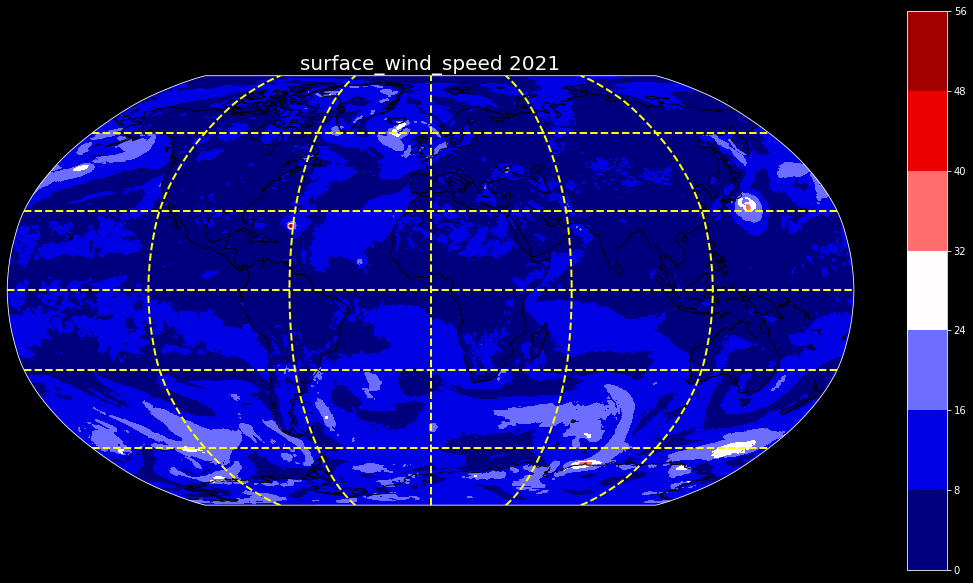

In [ ]:
figure = plt.figure(figsize=(15,10))

axis_func = plt.axes(projection=ccrs.Robinson())
axis_func.set_global()
axis_func.coastlines(resolution="110m",linewidth=1)
axis_func.gridlines(linestyle='--',color='yellow',linewidth=2)

plt.contourf(LONG_2021, LAT_2021, speedlml_2021, transform=ccrs.PlateCarree(),cmap="seismic")
color_bar_func = plt.colorbar(ax=axis_func, orientation="vertical",aspect=14, shrink=0.8, extend="max")
color_bar_func.ax.tick_params(labelsize=10)

plt.title(READING_2021.variables["speedlml"].long_name + " " + "2021",fontsize=20)
plt.tight_layout()
plt.show()

#


figure = plt.figure(figsize=(15,10))

axis_func = plt.axes(projection=ccrs.Robinson())
axis_func.set_global()
axis_func.coastlines(resolution="110m",linewidth=1)
axis_func.gridlines(linestyle='--',color='yellow',linewidth=2)

plt.contourf(LONG_2018, LAT_2018, speedlml_2018, transform=ccrs.PlateCarree(),cmap="seismic")
color_bar_func = plt.colorbar(ax=axis_func, orientation="vertical",aspect=14, shrink=0.8, extend="max")
color_bar_func.ax.tick_params(labelsize=10)

plt.title(READING_2018.variables["speedlml"].long_name + " " + "2018",fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
figure = plt.figure(figsize=(15,10))

axis_func = plt.axes(projection=ccrs.Robinson())
axis_func.set_global()
axis_func.coastlines(resolution="110m",linewidth=1)
axis_func.gridlines(linestyle='--',color='yellow',linewidth=2)

plt.contourf(LONG_2021, LAT_2021, qlml_2021, transform=ccrs.PlateCarree(),cmap="seismic")
color_bar_func = plt.colorbar(ax=axis_func, orientation="vertical",aspect=14, shrink=0.8, extend="max")
color_bar_func.ax.tick_params(labelsize=10)

plt.title(READING_2021.variables["qlml"].long_name + " " + "2021",fontsize=20)
plt.tight_layout()
plt.show()

#


figure = plt.figure(figsize=(15,10))

axis_func = plt.axes(projection=ccrs.Robinson())
axis_func.set_global()
axis_func.coastlines(resolution="110m",linewidth=1)
axis_func.gridlines(linestyle='--',color='yellow',linewidth=2)

plt.contourf(LONG_2018, LAT_2018, qlml_2018, transform=ccrs.PlateCarree(),cmap="seismic")
color_bar_func = plt.colorbar(ax=axis_func, orientation="vertical",aspect=14, shrink=0.8, extend="max")
color_bar_func.ax.tick_params(labelsize=10)

plt.title(READING_2018.variables["qlml"].long_name + " " + "2018",fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
LONG_ALL = [LONG_2018,LONG_2019,LONG_2020,LONG_2021]
LAT_ALL = [LAT_2018,LAT_2019,LAT_2020,LAT_2021]
HLML_ALL = [hlml_2018,hlml_2019,hlml_2020,hlml_2021]
TLML_ALL = [tlml_2018,tlml_2019,tlml_2020,tlml_2021]
PS_ALL = [ps_2018,ps_2019,ps_2020,ps_2021]
SPEEDLML_ALL = [speedlml_2018,speedlml_2019,speedlml_2020,speedlml_2021]
QLML_ALL = [qlml_2018,qlml_2019,qlml_2020,qlml_2021]

In [ ]:
for x_lon,x_lat,x_params,x_year in zip(LONG_ALL,LAT_ALL,HLML_ALL,YEAR_NAME_LIST):


    figure = plt.figure(figsize=(15,10))

    axis_func = plt.axes(projection=ccrs.Robinson())
    axis_func.set_global()
    axis_func.coastlines(resolution="110m",linewidth=1)
    axis_func.gridlines(linestyle='--',color='yellow',linewidth=2)

    plt.contourf(x_lon, x_lat, x_params, transform=ccrs.PlateCarree(),cmap="seismic")
    color_bar_func = plt.colorbar(ax=axis_func, orientation="vertical",aspect=14, shrink=0.8, extend="max")
    color_bar_func.ax.tick_params(labelsize=10)

    plt.title(READING_2018.variables["hlml"].long_name + " " + f"{x_year}",fontsize=20)
    plt.tight_layout()
    plt.show()

In [ ]:
for x_lon,x_lat,x_params,x_year in zip(LONG_ALL,LAT_ALL,TLML_ALL,YEAR_NAME_LIST):


    figure = plt.figure(figsize=(15,10))

    axis_func = plt.axes(projection=ccrs.Robinson())
    axis_func.set_global()
    axis_func.coastlines(resolution="110m",linewidth=1)
    axis_func.gridlines(linestyle='--',color='yellow',linewidth=2)

    plt.contourf(x_lon, x_lat, x_params, transform=ccrs.PlateCarree(),cmap="seismic")
    color_bar_func = plt.colorbar(ax=axis_func, orientation="vertical",aspect=14, shrink=0.8, extend="max")
    color_bar_func.ax.tick_params(labelsize=10)

    plt.title(READING_2018.variables["tlml"].long_name + " " + f"{x_year}",fontsize=20)
    plt.tight_layout()
    plt.show()

In [ ]:
for x_lon,x_lat,x_params,x_year in zip(LONG_ALL,LAT_ALL,PS_ALL,YEAR_NAME_LIST):


    figure = plt.figure(figsize=(15,10))

    axis_func = plt.axes(projection=ccrs.Robinson())
    axis_func.set_global()
    axis_func.coastlines(resolution="110m",linewidth=1)
    axis_func.gridlines(linestyle='--',color='yellow',linewidth=2)

    plt.contourf(x_lon, x_lat, x_params, transform=ccrs.PlateCarree(),cmap="seismic")
    color_bar_func = plt.colorbar(ax=axis_func, orientation="vertical",aspect=14, shrink=0.8, extend="max")
    color_bar_func.ax.tick_params(labelsize=10)

    plt.title(READING_2018.variables["ps"].long_name + " " + f"{x_year}",fontsize=20)
    plt.tight_layout()
    plt.show()

In [ ]:
for x_lon,x_lat,x_params,x_year in zip(LONG_ALL,LAT_ALL,SPEEDLML_ALL,YEAR_NAME_LIST):


    figure = plt.figure(figsize=(15,10))

    axis_func = plt.axes(projection=ccrs.Robinson())
    axis_func.set_global()
    axis_func.coastlines(resolution="110m",linewidth=1)
    axis_func.gridlines(linestyle='--',color='yellow',linewidth=2)

    plt.contourf(x_lon, x_lat, x_params, transform=ccrs.PlateCarree(),cmap="seismic")
    color_bar_func = plt.colorbar(ax=axis_func, orientation="vertical",aspect=14, shrink=0.8, extend="max")
    color_bar_func.ax.tick_params(labelsize=10)

    plt.title(READING_2018.variables["speedlml"].long_name + " " + f"{x_year}",fontsize=20)
    plt.tight_layout()
    plt.show()

In [ ]:
for x_lon,x_lat,x_params,x_year in zip(LONG_ALL,LAT_ALL,QLML_ALL,YEAR_NAME_LIST):


    figure = plt.figure(figsize=(15,10))

    axis_func = plt.axes(projection=ccrs.Robinson())
    axis_func.set_global()
    axis_func.coastlines(resolution="110m",linewidth=1)
    axis_func.gridlines(linestyle='--',color='yellow',linewidth=2)

    plt.contourf(x_lon, x_lat, x_params, transform=ccrs.PlateCarree(),cmap="seismic")
    color_bar_func = plt.colorbar(ax=axis_func, orientation="vertical",aspect=14, shrink=0.8, extend="max")
    color_bar_func.ax.tick_params(labelsize=10)

    plt.title(READING_2018.variables["qlml"].long_name + " " + f"{x_year}",fontsize=20)
    plt.tight_layout()
    plt.show()

In [ ]:
plt.figure(figsize=(22,7))
plt.plot(hlml_2018[0,:].flatten(),color="white",label="2018")
plt.plot(hlml_2019[0,:].flatten(),color="green",label="2019")
plt.plot(hlml_2020[0,:].flatten(),color="blue",label="2020")
plt.plot(hlml_2021[0,:].flatten(),color="red",label="2021")

plt.title(READING_2018.variables["hlml"].long_name,fontsize=25)
plt.legend(fontsize=19)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(22,7))
plt.plot(hlml_2018[:,0].flatten(),color="white",label="2018")
plt.plot(hlml_2019[:,0].flatten(),color="green",label="2019")
plt.plot(hlml_2020[:,0].flatten(),color="blue",label="2020")
plt.plot(hlml_2021[:,0].flatten(),color="red",label="2021")

plt.title(READING_2018.variables["hlml"].long_name,fontsize=25)
plt.legend(fontsize=19)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(22,7))
plt.plot(tlml_2018[0,:].flatten(),color="white",label="2018")
plt.plot(tlml_2019[0,:].flatten(),color="green",label="2019")
plt.plot(tlml_2020[0,:].flatten(),color="blue",label="2020")
plt.plot(tlml_2021[0,:].flatten(),color="red",label="2021")

plt.title(READING_2018.variables["tlml"].long_name,fontsize=25)
plt.legend(fontsize=19)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(22,7))
plt.plot(tlml_2018[:,0].flatten(),color="white",label="2018")
plt.plot(tlml_2019[:,0].flatten(),color="green",label="2019")
plt.plot(tlml_2020[:,0].flatten(),color="blue",label="2020")
plt.plot(tlml_2021[:,0].flatten(),color="red",label="2021")

plt.title(READING_2018.variables["tlml"].long_name,fontsize=25)
plt.legend(fontsize=19)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(22,7))
plt.plot(ps_2018[0,:].flatten(),color="white",label="2018")
plt.plot(ps_2019[0,:].flatten(),color="green",label="2019")
plt.plot(ps_2020[0,:].flatten(),color="blue",label="2020")
plt.plot(ps_2021[0,:].flatten(),color="red",label="2021")

plt.title(READING_2018.variables["ps"].long_name,fontsize=25)
plt.legend(fontsize=19)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(22,7))
plt.plot(ps_2018[:,0].flatten(),color="white",label="2018")
plt.plot(ps_2019[:,0].flatten(),color="green",label="2019")
plt.plot(ps_2020[:,0].flatten(),color="blue",label="2020")
plt.plot(ps_2021[:,0].flatten(),color="red",label="2021")

plt.title(READING_2018.variables["ps"].long_name,fontsize=25)
plt.legend(fontsize=19)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(22,7))
plt.plot(speedlml_2018[0,:].flatten(),color="white",label="2018")
plt.plot(speedlml_2019[0,:].flatten(),color="green",label="2019")
plt.plot(speedlml_2020[0,:].flatten(),color="blue",label="2020")
plt.plot(speedlml_2021[0,:].flatten(),color="red",label="2021")

plt.title(READING_2018.variables["speedlml"].long_name,fontsize=25)
plt.legend(fontsize=19)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(22,7))
plt.plot(speedlml_2018[:,0].flatten(),color="white",label="2018")
plt.plot(speedlml_2019[:,0].flatten(),color="green",label="2019")
plt.plot(speedlml_2020[:,0].flatten(),color="blue",label="2020")
plt.plot(speedlml_2021[:,0].flatten(),color="red",label="2021")

plt.title(READING_2018.variables["speedlml"].long_name,fontsize=25)
plt.legend(fontsize=19)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(22,7))
plt.plot(qlml_2018[0,:].flatten(),color="white",label="2018")
plt.plot(qlml_2019[0,:].flatten(),color="green",label="2019")
plt.plot(qlml_2020[0,:].flatten(),color="blue",label="2020")
plt.plot(qlml_2021[0,:].flatten(),color="red",label="2021")

plt.title(READING_2018.variables["qlml"].long_name,fontsize=25)
plt.legend(fontsize=19)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(22,7))
plt.plot(qlml_2018[:,0].flatten(),color="white",label="2018")
plt.plot(qlml_2019[:,0].flatten(),color="green",label="2019")
plt.plot(qlml_2020[:,0].flatten(),color="blue",label="2020")
plt.plot(qlml_2021[:,0].flatten(),color="red",label="2021")

plt.title(READING_2018.variables["qlml"].long_name,fontsize=25)
plt.legend(fontsize=19)
plt.tight_layout()
plt.show()

In [ ]:
def displaying_climate_params(source):

    figure = plt.figure(figsize=(16,11))

    Image_List = []
    plt.style.use("dark_background")
    for indexing in source:

        Read_IMG = plt.imshow(indexing, animated=True,cmap="hot")
        plt.axis('off')
        Image_List.append([Read_IMG])

    Animation_Func = animation.ArtistAnimation(figure, Image_List, interval=210, repeat_delay=10200)

    plt.close()

    return Animation_Func

In [ ]:
HLML_2018_LIST= []

for x_time in range(len(READING_2018.variables["hlml"][:,0,0])):


    figure = plt.figure(figsize=(15,10))

    axis_func = plt.axes(projection=ccrs.Robinson())
    axis_func.set_global()
    axis_func.coastlines(resolution="110m",linewidth=1)
    axis_func.gridlines(linestyle='--',color='yellow',linewidth=2)

    plt.contourf(LONG_2018, LAT_2018, READING_2018.variables["hlml"][x_time,:,:], transform=ccrs.PlateCarree(),cmap="seismic")
    color_bar_func = plt.colorbar(ax=axis_func, orientation="vertical",aspect=14, shrink=0.8, extend="max")
    color_bar_func.ax.tick_params(labelsize=10)

    plt.title(READING_2018.variables["hlml"].long_name + " " + f"{x_time}",fontsize=20)
    plt.savefig(f"HLML_2018_RESULT_{x_time}.jpg")
    NEW_READING_IMG = cv2.cvtColor(cv2.imread(f"HLML_2018_RESULT_{x_time}.jpg"),cv2.COLOR_BGR2RGB)
    HLML_2018_LIST.append(NEW_READING_IMG)
    plt.tight_layout()
    plt.show()

In [ ]:
HLML_2021_LIST= []

for x_time in range(len(READING_2021.variables["hlml"][:,0,0])):


    figure = plt.figure(figsize=(15,10))

    axis_func = plt.axes(projection=ccrs.Robinson())
    axis_func.set_global()
    axis_func.coastlines(resolution="110m",linewidth=1)
    axis_func.gridlines(linestyle='--',color='yellow',linewidth=2)

    plt.contourf(LONG_2021, LAT_2021, READING_2021.variables["hlml"][x_time,:,:], transform=ccrs.PlateCarree(),cmap="seismic")
    color_bar_func = plt.colorbar(ax=axis_func, orientation="vertical",aspect=14, shrink=0.8, extend="max")
    color_bar_func.ax.tick_params(labelsize=10)

    plt.title(READING_2021.variables["hlml"].long_name + " " + f"{x_time}",fontsize=20)
    plt.savefig(f"HLML_2021_RESULT_{x_time}.jpg")
    NEW_READING_IMG = cv2.cvtColor(cv2.imread(f"HLML_2021_RESULT_{x_time}.jpg"),cv2.COLOR_BGR2RGB)
    HLML_2021_LIST.append(NEW_READING_IMG)
    plt.tight_layout()
    plt.show()

In [ ]:
TLML_2018_LIST= []

for x_time in range(len(READING_2018.variables["tlml"][:,0,0])):


    figure = plt.figure(figsize=(15,10))

    axis_func = plt.axes(projection=ccrs.Robinson())
    axis_func.set_global()
    axis_func.coastlines(resolution="110m",linewidth=1)
    axis_func.gridlines(linestyle='--',color='yellow',linewidth=2)

    plt.contourf(LONG_2018, LAT_2018, READING_2018.variables["tlml"][x_time,:,:], transform=ccrs.PlateCarree(),cmap="seismic")
    color_bar_func = plt.colorbar(ax=axis_func, orientation="vertical",aspect=14, shrink=0.8, extend="max")
    color_bar_func.ax.tick_params(labelsize=10)

    plt.title(READING_2018.variables["tlml"].long_name + " " + f"{x_time}",fontsize=20)
    plt.savefig(f"TLML_2018_RESULT_{x_time}.jpg")
    NEW_READING_IMG = cv2.cvtColor(cv2.imread(f"TLML_2018_RESULT_{x_time}.jpg"),cv2.COLOR_BGR2RGB)
    TLML_2018_LIST.append(NEW_READING_IMG)
    plt.tight_layout()
    plt.show()

In [ ]:
TLML_2021_LIST= []

for x_time in range(len(READING_2021.variables["tlml"][:,0,0])):


    figure = plt.figure(figsize=(15,10))

    axis_func = plt.axes(projection=ccrs.Robinson())
    axis_func.set_global()
    axis_func.coastlines(resolution="110m",linewidth=1)
    axis_func.gridlines(linestyle='--',color='yellow',linewidth=2)

    plt.contourf(LONG_2021, LAT_2021, READING_2021.variables["tlml"][x_time,:,:], transform=ccrs.PlateCarree(),cmap="seismic")
    color_bar_func = plt.colorbar(ax=axis_func, orientation="vertical",aspect=14, shrink=0.8, extend="max")
    color_bar_func.ax.tick_params(labelsize=10)

    plt.title(READING_2021.variables["tlml"].long_name + " " + f"{x_time}",fontsize=20)
    plt.savefig(f"TLML_2021_RESULT_{x_time}.jpg")
    NEW_READING_IMG = cv2.cvtColor(cv2.imread(f"TLML_2021_RESULT_{x_time}.jpg"),cv2.COLOR_BGR2RGB)
    TLML_2021_LIST.append(NEW_READING_IMG)
    plt.tight_layout()
    plt.show()

In [ ]:
PS_2021_LIST= []

for x_time in range(len(READING_2021.variables["ps"][:,0,0])):


    figure = plt.figure(figsize=(15,10))

    axis_func = plt.axes(projection=ccrs.Robinson())
    axis_func.set_global()
    axis_func.coastlines(resolution="110m",linewidth=1)
    axis_func.gridlines(linestyle='--',color='yellow',linewidth=2)

    plt.contourf(LONG_2021, LAT_2021, READING_2021.variables["ps"][x_time,:,:], transform=ccrs.PlateCarree(),cmap="seismic")
    color_bar_func = plt.colorbar(ax=axis_func, orientation="vertical",aspect=14, shrink=0.8, extend="max")
    color_bar_func.ax.tick_params(labelsize=10)

    plt.title(READING_2021.variables["ps"].long_name + " " + f"{x_time}",fontsize=20)
    plt.savefig(f"PS_2021_RESULT_{x_time}.jpg")
    NEW_READING_IMG = cv2.cvtColor(cv2.imread(f"PS_2021_RESULT_{x_time}.jpg"),cv2.COLOR_BGR2RGB)
    PS_2021_LIST.append(NEW_READING_IMG)
    plt.tight_layout()
    plt.show()

In [ ]:
PS_2018_LIST= []

for x_time in range(len(READING_2018.variables["ps"][:,0,0])):


    figure = plt.figure(figsize=(15,10))

    axis_func = plt.axes(projection=ccrs.Robinson())
    axis_func.set_global()
    axis_func.coastlines(resolution="110m",linewidth=1)
    axis_func.gridlines(linestyle='--',color='yellow',linewidth=2)

    plt.contourf(LONG_2018, LAT_2018, READING_2018.variables["ps"][x_time,:,:], transform=ccrs.PlateCarree(),cmap="seismic")
    color_bar_func = plt.colorbar(ax=axis_func, orientation="vertical",aspect=14, shrink=0.8, extend="max")
    color_bar_func.ax.tick_params(labelsize=10)

    plt.title(READING_2018.variables["ps"].long_name + " " + f"{x_time}",fontsize=20)
    plt.savefig(f"PS_2018_RESULT_{x_time}.jpg")
    NEW_READING_IMG = cv2.cvtColor(cv2.imread(f"PS_2018_RESULT_{x_time}.jpg"),cv2.COLOR_BGR2RGB)
    PS_2018_LIST.append(NEW_READING_IMG)
    plt.tight_layout()
    plt.show()

In [ ]:
QLML_2018_LIST= []

for x_time in range(len(READING_2018.variables["qlml"][:,0,0])):


    figure = plt.figure(figsize=(15,10))

    axis_func = plt.axes(projection=ccrs.Robinson())
    axis_func.set_global()
    axis_func.coastlines(resolution="110m",linewidth=1)
    axis_func.gridlines(linestyle='--',color='yellow',linewidth=2)

    plt.contourf(LONG_2018, LAT_2018, READING_2018.variables["qlml"][x_time,:,:], transform=ccrs.PlateCarree(),cmap="seismic")
    color_bar_func = plt.colorbar(ax=axis_func, orientation="vertical",aspect=14, shrink=0.8, extend="max")
    color_bar_func.ax.tick_params(labelsize=10)

    plt.title(READING_2018.variables["qlml"].long_name + " " + f"{x_time}",fontsize=20)
    plt.savefig(f"QLML_2018_RESULT_{x_time}.jpg")
    NEW_READING_IMG = cv2.cvtColor(cv2.imread(f"QLML_2018_RESULT_{x_time}.jpg"),cv2.COLOR_BGR2RGB)
    QLML_2018_LIST.append(NEW_READING_IMG)
    plt.tight_layout()
    plt.show()

In [ ]:
QLML_2021_LIST= []

for x_time in range(len(READING_2021.variables["qlml"][:,0,0])):


    figure = plt.figure(figsize=(15,10))

    axis_func = plt.axes(projection=ccrs.Robinson())
    axis_func.set_global()
    axis_func.coastlines(resolution="110m",linewidth=1)
    axis_func.gridlines(linestyle='--',color='yellow',linewidth=2)

    plt.contourf(LONG_2021, LAT_2021, READING_2021.variables["qlml"][x_time,:,:], transform=ccrs.PlateCarree(),cmap="seismic")
    color_bar_func = plt.colorbar(ax=axis_func, orientation="vertical",aspect=14, shrink=0.8, extend="max")
    color_bar_func.ax.tick_params(labelsize=10)

    plt.title(READING_2021.variables["qlml"].long_name + " " + f"{x_time}",fontsize=20)
    plt.savefig(f"QLML_2021_RESULT_{x_time}.jpg")
    NEW_READING_IMG = cv2.cvtColor(cv2.imread(f"QLML_2021_RESULT_{x_time}.jpg"),cv2.COLOR_BGR2RGB)
    QLML_2021_LIST.append(NEW_READING_IMG)
    plt.tight_layout()
    plt.show()

In [ ]:
SPEED_2018_LIST= []

for x_time in range(len(READING_2018.variables["speedlml"][:,0,0])):


    figure = plt.figure(figsize=(15,10))

    axis_func = plt.axes(projection=ccrs.Robinson())
    axis_func.set_global()
    axis_func.coastlines(resolution="110m",linewidth=1)
    axis_func.gridlines(linestyle='--',color='yellow',linewidth=2)

    plt.contourf(LONG_2018, LAT_2018, READING_2018.variables["speedlml"][x_time,:,:], transform=ccrs.PlateCarree(),cmap="seismic")
    color_bar_func = plt.colorbar(ax=axis_func, orientation="vertical",aspect=14, shrink=0.8, extend="max")
    color_bar_func.ax.tick_params(labelsize=10)

    plt.title(READING_2018.variables["speedlml"].long_name + " " + f"{x_time}",fontsize=20)
    plt.savefig(f"SPEED_2018_RESULT_{x_time}.jpg")
    NEW_READING_IMG = cv2.cvtColor(cv2.imread(f"SPEED_2018_RESULT_{x_time}.jpg"),cv2.COLOR_BGR2RGB)
    SPEED_2018_LIST.append(NEW_READING_IMG)
    plt.tight_layout()
    plt.show()

In [ ]:
SPEED_2021_LIST= []

for x_time in range(len(READING_2021.variables["speedlml"][:,0,0])):


    figure = plt.figure(figsize=(15,10))

    axis_func = plt.axes(projection=ccrs.Robinson())
    axis_func.set_global()
    axis_func.coastlines(resolution="110m",linewidth=1)
    axis_func.gridlines(linestyle='--',color='yellow',linewidth=2)

    plt.contourf(LONG_2021, LAT_2021, READING_2021.variables["speedlml"][x_time,:,:], transform=ccrs.PlateCarree(),cmap="seismic")
    color_bar_func = plt.colorbar(ax=axis_func, orientation="vertical",aspect=14, shrink=0.8, extend="max")
    color_bar_func.ax.tick_params(labelsize=10)

    plt.title(READING_2021.variables["speedlml"].long_name + " " + f"{x_time}",fontsize=20)
    plt.savefig(f"SPEED_2021_RESULT_{x_time}.jpg")
    NEW_READING_IMG = cv2.cvtColor(cv2.imread(f"SPEED_2021_RESULT_{x_time}.jpg"),cv2.COLOR_BGR2RGB)
    SPEED_2021_LIST.append(NEW_READING_IMG)
    plt.tight_layout()
    plt.show()

In [ ]:
HTML(displaying_climate_params(HLML_2018_LIST).to_html5_video())

In [ ]:
HTML(displaying_climate_params(HLML_2021_LIST).to_html5_video())

In [ ]:
HTML(displaying_climate_params(TLML_2018_LIST).to_html5_video())

In [ ]:
HTML(displaying_climate_params(TLML_2021_LIST).to_html5_video())

In [ ]:
HTML(displaying_climate_params(PS_2018_LIST).to_html5_video())

In [ ]:
HTML(displaying_climate_params(PS_2021_LIST).to_html5_video())

In [ ]:
HTML(displaying_climate_params(QLML_2018_LIST).to_html5_video())

In [ ]:
HTML(displaying_climate_params(QLML_2021_LIST).to_html5_video())

In [ ]:
HTML(displaying_climate_params(SPEED_2018_LIST).to_html5_video())

In [ ]:
HTML(displaying_climate_params(SPEED_2021_LIST).to_html5_video())

# NUMERIC

In [ ]:
LONG_ALL = [LONG_2018,LONG_2019,LONG_2020,LONG_2021]
LAT_ALL = [LAT_2018,LAT_2019,LAT_2020,LAT_2021]
HLML_ALL = [hlml_2018,hlml_2019,hlml_2020,hlml_2021]
TLML_ALL = [tlml_2018,tlml_2019,tlml_2020,tlml_2021]
PS_ALL = [ps_2018,ps_2019,ps_2020,ps_2021]
SPEEDLML_ALL = [speedlml_2018,speedlml_2019,speedlml_2020,speedlml_2021]
QLML_ALL = [qlml_2018,qlml_2019,qlml_2020,qlml_2021]

In [ ]:
for x_keys,x_year in zip(HLML_ALL,YEAR_NAME_LIST):
    print("\n")
    print(f"{x_year} / HLML - MAX")
    print("---"*5)
    print(x_keys.max())
    print("----"*10)
    print("\n")

In [ ]:
for x_keys,x_year in zip(HLML_ALL,YEAR_NAME_LIST):
    print("\n")
    print(READING_2018.variables["hlml"].long_name)
    print(f"{x_year} / HLML - MEAN")
    print("---"*5)
    print(x_keys.mean())
    print("----"*10)
    print("\n")

In [ ]:
for x_keys,x_year in zip(HLML_ALL,YEAR_NAME_LIST):
    print("\n")
    print(READING_2018.variables["hlml"].long_name)
    print(f"{x_year} / HLML - MIN")
    print("---"*5)
    print(x_keys.min())
    print("----"*10)
    print("\n")

In [ ]:
for x_keys,x_year in zip(TLML_ALL,YEAR_NAME_LIST):
    print("\n")
    print(f"{x_year} / TLML - MAX")
    print("---"*5)
    print(x_keys.max())
    print("----"*10)
    print("\n")

In [ ]:
for x_keys,x_year in zip(TLML_ALL,YEAR_NAME_LIST):
    print("\n")
    print(READING_2018.variables["tlml"].long_name)
    print(f"{x_year} / TLML - MEAN")
    print("---"*5)
    print(x_keys.mean())
    print("----"*10)
    print("\n")

In [ ]:
for x_keys,x_year in zip(TLML_ALL,YEAR_NAME_LIST):
    print("\n")
    print(READING_2018.variables["tlml"].long_name)
    print(f"{x_year} / TLML - MIN")
    print("---"*5)
    print(x_keys.min())
    print("----"*10)
    print("\n")

In [ ]:
for x_keys,x_year in zip(PS_ALL,YEAR_NAME_LIST):
    print("\n")
    print(f"{x_year} / PS - MAX")
    print("---"*5)
    print(x_keys.max())
    print("----"*10)
    print("\n")

In [ ]:
for x_keys,x_year in zip(PS_ALL,YEAR_NAME_LIST):
    print("\n")
    print(READING_2018.variables["ps"].long_name)
    print(f"{x_year} / PS - MEAN")
    print("---"*5)
    print(x_keys.mean())
    print("----"*10)
    print("\n")

In [ ]:
for x_keys,x_year in zip(PS_ALL,YEAR_NAME_LIST):
    print("\n")
    print(READING_2018.variables["ps"].long_name)
    print(f"{x_year} / PS - MIN")
    print("---"*5)
    print(x_keys.min())
    print("----"*10)
    print("\n")

In [ ]:
for x_keys,x_year in zip(SPEEDLML_ALL,YEAR_NAME_LIST):
    print("\n")
    print(f"{x_year} / SPEEDLML - MAX")
    print("---"*5)
    print(x_keys.max())
    print("----"*10)
    print("\n")

In [ ]:
for x_keys,x_year in zip(SPEEDLML_ALL,YEAR_NAME_LIST):
    print("\n")
    print(READING_2018.variables["speedlml"].long_name)
    print(f"{x_year} / SPEEDLML - MEAN")
    print("---"*5)
    print(x_keys.mean())
    print("----"*10)
    print("\n")

In [ ]:
for x_keys,x_year in zip(SPEEDLML_ALL,YEAR_NAME_LIST):
    print("\n")
    print(READING_2018.variables["speedlml"].long_name)
    print(f"{x_year} / SPEEDLML - MIN")
    print("---"*5)
    print(x_keys.min())
    print("----"*10)
    print("\n")

In [ ]:
for x_keys,x_year in zip(QLML_ALL,YEAR_NAME_LIST):
    print("\n")
    print(f"{x_year} / QLML - MAX")
    print("---"*5)
    print(x_keys.max())
    print("----"*10)
    print("\n")

In [ ]:
for x_keys,x_year in zip(QLML_ALL,YEAR_NAME_LIST):
    print("\n")
    print(READING_2018.variables["qlml"].long_name)
    print(f"{x_year} / QLML - MEAN")
    print("---"*5)
    print(x_keys.mean())
    print("----"*10)
    print("\n")

In [ ]:
for x_keys,x_year in zip(QLML_ALL,YEAR_NAME_LIST):
    print("\n")
    print(READING_2018.variables["qlml"].long_name)
    print(f"{x_year} / QLML - MIN")
    print("---"*5)
    print("%.14f" % x_keys.min())
    print("----"*10)
    print("\n")